### **Analysis of the War in Ukraine**



The current Ukraine crisis poses a unique threat to international security — from the potentially devastating human costs and the involvement of a major nuclear power, to the significant geopolitical and economic ramifications the war could entail for the entire world. To help track these trends as they develop, ACLED has created this dedicated Research Hub to provide near real-time information on the conflict, including a curated data file, interactive data visualization tools, and weekly analysis of violence patterns in Ukraine, Russia, and the broader region.

https://acleddata.com/ukraine-crisis/#data


This dataset contains all political violence events, demonstration events, and strategic developments recorded in Ukraine and the Black Sea from the beginning of ACLED coverage in 2018 to the present.

Below are a few graphs and charts that visualize some of the data ACLED has published.

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Ukraine_Black_Sea_2020_2023_Jan20.xlsx to Ukraine_Black_Sea_2020_2023_Jan20.xlsx


In [3]:
df = pd.read_excel("Ukraine_Black_Sea_2020_2023_Jan20.xlsx")
print(df.dtypes)
df.head(5)

ISO                          int64
EVENT_ID_CNTY               object
EVENT_ID_NO_CNTY             int64
EVENT_DATE          datetime64[ns]
YEAR                         int64
TIME_PRECISION               int64
EVENT_TYPE                  object
SUB_EVENT_TYPE              object
ACTOR1                      object
ASSOC_ACTOR_1               object
INTER1                       int64
ACTOR2                      object
ASSOC_ACTOR_2               object
INTER2                       int64
INTERACTION                  int64
REGION                      object
COUNTRY                     object
ADMIN1                      object
ADMIN2                      object
ADMIN3                      object
LOCATION                    object
LATITUDE                   float64
LONGITUDE                  float64
GEO_PRECISION                int64
SOURCE                      object
SOURCE_SCALE                object
NOTES                       object
FATALITIES                   int64
TIMESTAMP           

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,642,ROU448,448,2019-05-20,2019,1,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,NaN,...,NaN,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-Regional,"On 20 May 2019, the Coast Guard of Romania fir...",0,1649875498
1,642,ROU1885,1885,2022-03-28,2022,1,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,...,NaN,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,1649184809
2,642,ROU1940,1940,2022-07-28,2022,1,Protests,Peaceful protest,Protesters (Romania),Greenpeace,...,NaN,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,1659462993
3,642,ROU1945,1945,2022-07-31,2022,1,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,...,NaN,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,1660055880
4,642,ROU1947,1947,2022-08-04,2022,1,Protests,Peaceful protest,Protesters (Romania),Greenpeace,...,NaN,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,1660055882


In [5]:
# Clean up column names

df.columns = (df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ','_')
    .str.replace('-','_')
    .str.replace('(','')
    .str.replace(')','')
    .str.replace('?','')
    .str.replace('/','')
    .str.replace('\'','')
    )

<ipython-input-5-b73d50f396c3>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('(','')
<ipython-input-5-b73d50f396c3>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(')','')
<ipython-input-5-b73d50f396c3>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('?','')


In [6]:
df.isnull().sum(axis = 0)

iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       82598
inter1                  0
actor2              39851
assoc_actor_2       74302
inter2                  0
interaction             0
region                  0
country                 0
admin1                 16
admin2                 88
admin3               2382
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
dtype: int64

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# Import seaborn
import seaborn as sns

# Tell Jupyter to display the graphs in the notebook
%matplotlib inline

# Import the style of the plots
import matplotlib.style as style
style.available
style.use('fivethirtyeight')
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Let's look at the top 10 locations for fatalities in 2022

What is the most dangerous location in Ukraine in 2022? Is it near Russia or near Kiev?


In [9]:
df2 = df.loc[(df['year'] == 2022) & (df['time_precision'] >= 1), :]

In [10]:
exl = df2.groupby('location')[['fatalities']].sum()
exl = exl.reset_index()
exl.columns = ["location","sum"]
events7 = exl.nlargest(10,"sum")
events7

,location,sum
755,Luhansk,2824
521,Kherson,1330
830,Mariupol,1057
793,Makiivka,1038
517,Kharkiv,992
296,Donetsk,926
1904,Zaporizhia,718
102,Bilohorivka,714
908,Mykolaiv,568
643,Kreminna,566


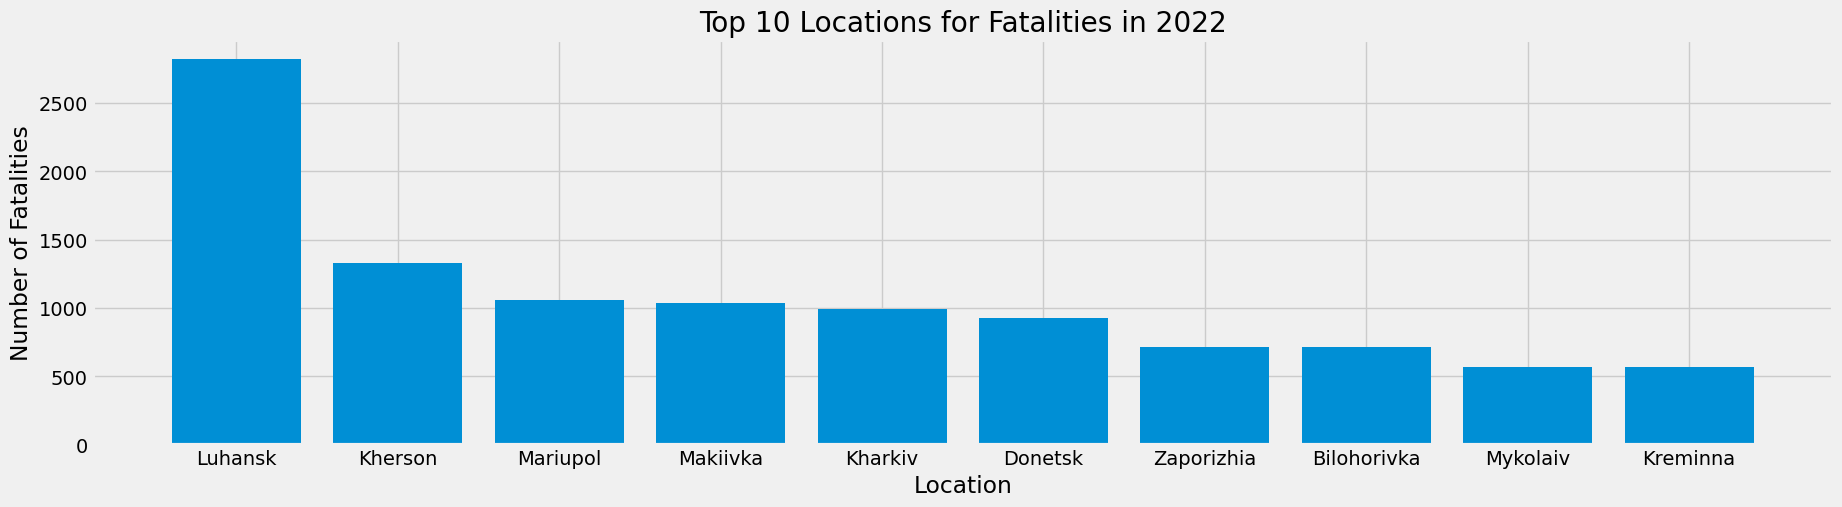

In [11]:
plt.figure(figsize=(20, 5))
plt.bar(events7['location'], events7['sum'])
plt.title('Top 10 Locations for Fatalities in 2022')
plt.ylabel('Number of Fatalities')
plt.xlabel('Location')
plt.xticks(rotation=360)
plt.show()

In [ ]:
# Luhansk is the most dangerous city in Ukraine in 2022. Unsurprisingly, it is 800 kilometers from Kyiv but very close to the Russian border.

Let's chart fatalities by event type for 2022

In [13]:
df11 = df.loc[(df['year'] == 2022) & (df['fatalities'] >= 0), :]

In [16]:
exl = df11.groupby('sub_event_type')[['fatalities']].sum()
exl = exl.reset_index()
exl.columns = ["sub_event_type","sum"]
events11 = exl.nlargest(5,"sum")
events11

,sub_event_type,sum
21,Shelling/artillery/missile attack,12457
3,Armed clash,12143
2,Air/drone strike,2320
5,Attack,1205
19,Remote explosive/landmine/IED,302


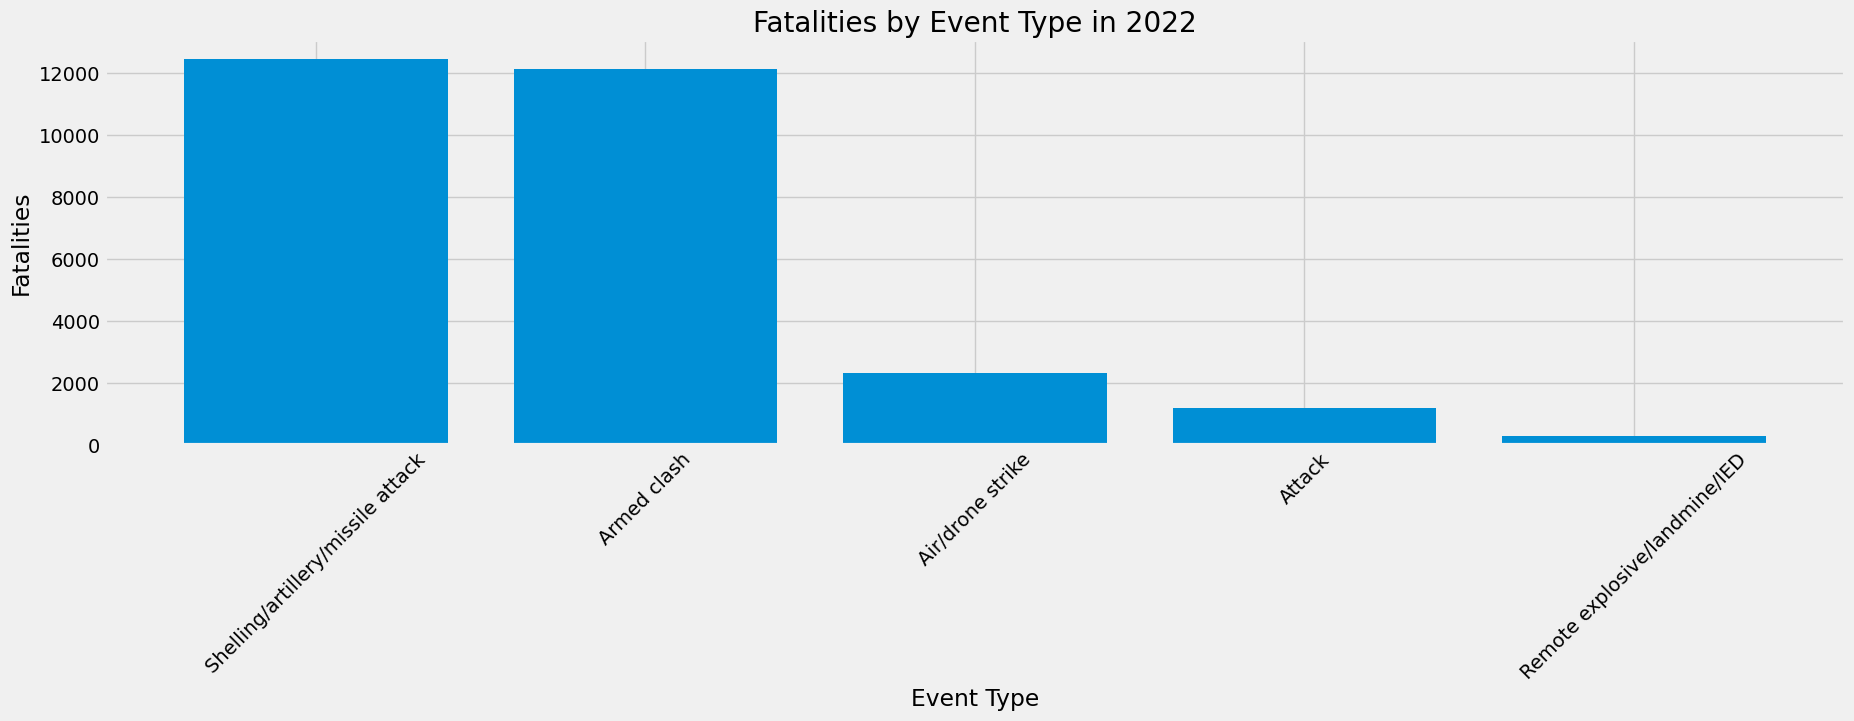

In [19]:
plt.figure(figsize=(20, 5))
plt.bar(events11['sub_event_type'], events11['sum'])
plt.title('Fatalities by Event Type in 2022')
plt.ylabel('Fatalities')
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.show()

What are the top 50 locations for fatalities in 2022?

In [20]:
exl = df11.groupby('location')[['fatalities']].sum()
exl = exl.reset_index()
exl.columns = ["location","sum"]
events12 = exl.nlargest(50,"sum")

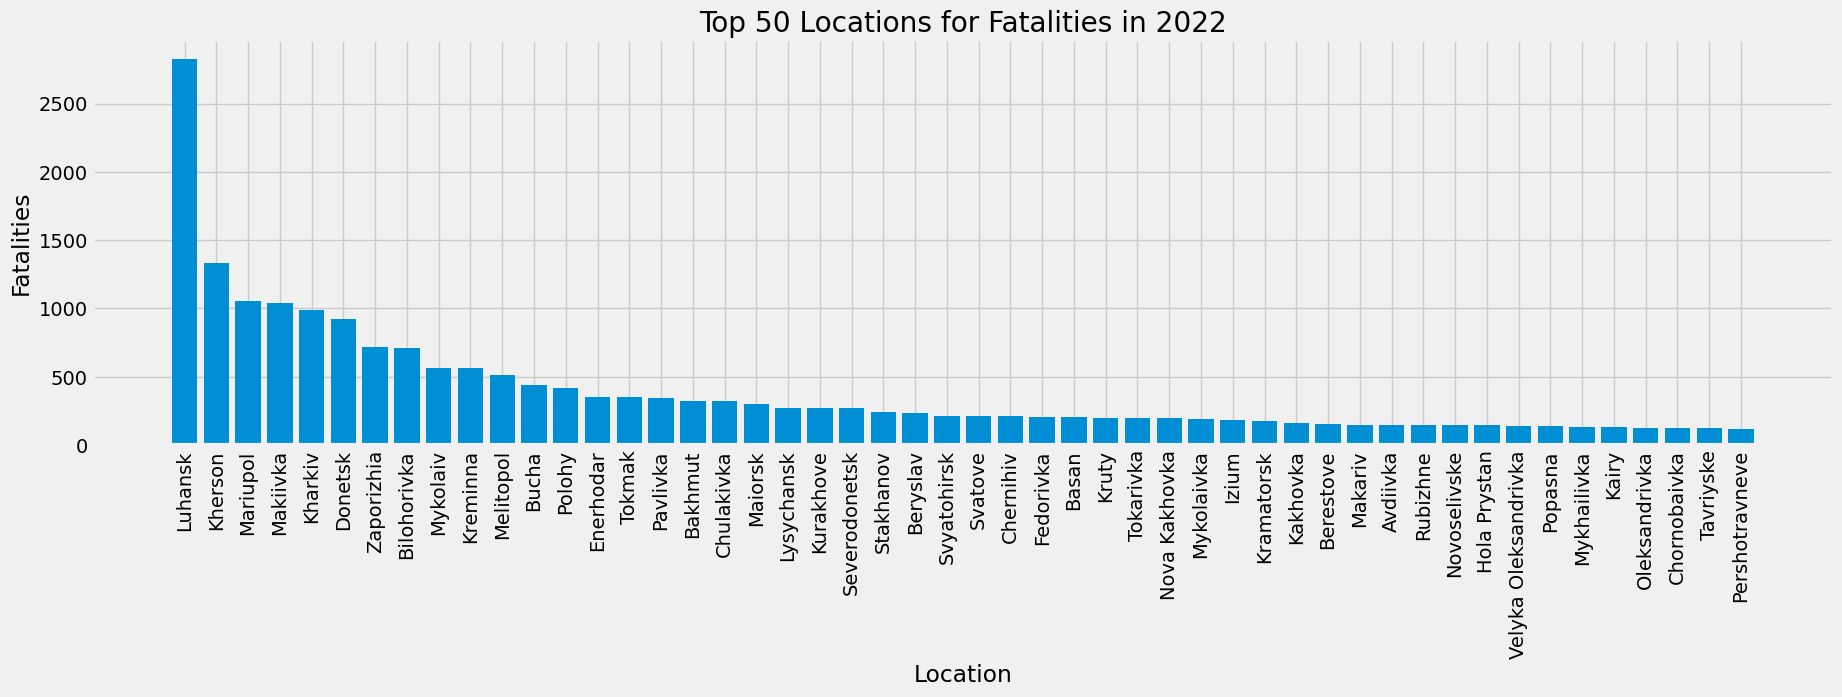

In [21]:
plt.figure(figsize=(20, 5))
plt.bar(events12['location'], events12['sum'])
plt.title('Top 50 Locations for Fatalities in 2022')
plt.ylabel('Fatalities')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.show()

Let's look at air drone strokes by month from the beginning of the conflict to the present

In [22]:
df12 = df.loc[(df['sub_event_type'] == "Air/drone strike") & (df['fatalities'] >= 0), :]

In [23]:
df['month'] = pd.DatetimeIndex(df['event_date']).month

In [24]:
cols=["year","month"]
df12['monthandyear'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

<ipython-input-24-ac5a781d1513>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['monthandyear'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [29]:
exl = df12.groupby('monthandyear')[['sub_event_type']].count()
exl = exl.reset_index()
exl.columns = ["monthandyear","count"]
events15 = exl.nlargest(20,"count")

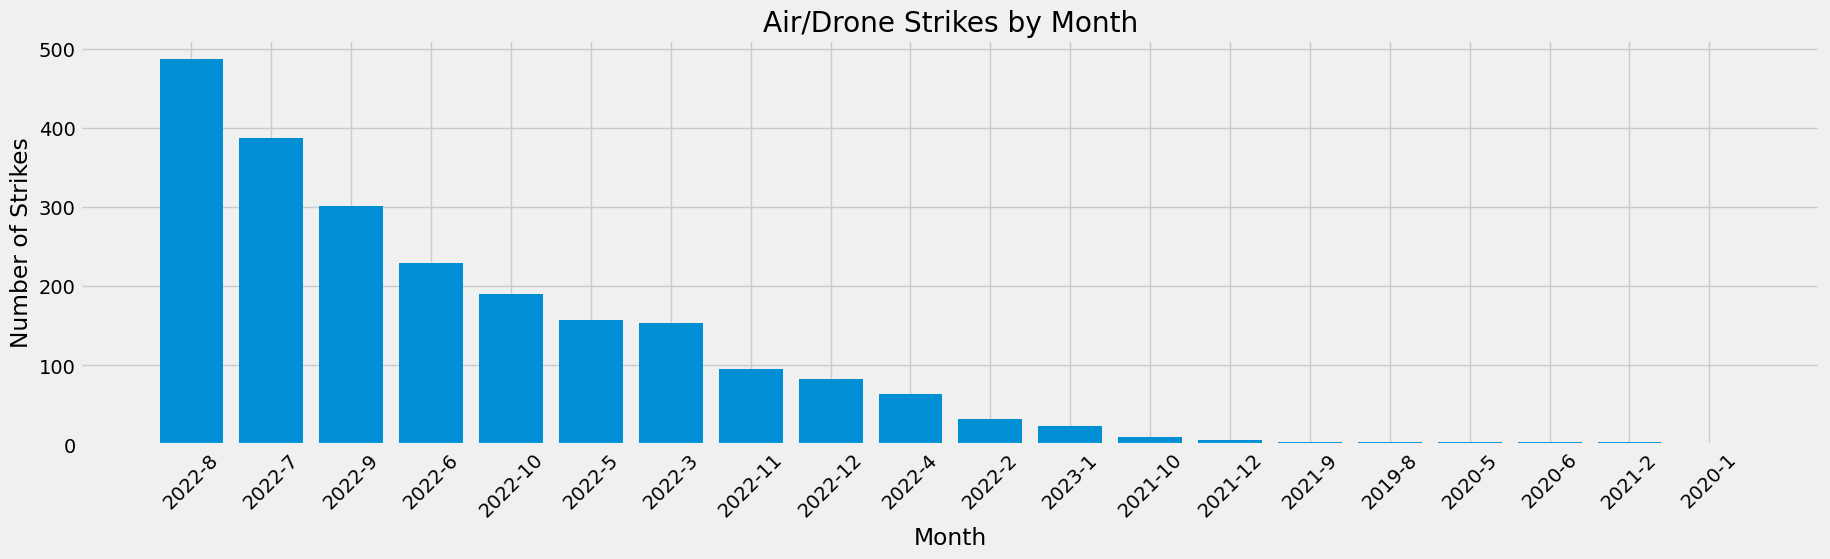

In [30]:
plt.figure(figsize=(20, 5))
plt.bar(events15['monthandyear'], events15['count'])
plt.title('Air/Drone Strikes by Month')
plt.ylabel('Number of Strikes')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Nearly all drone strikes appeared in 2022, so they increased as the conflict went on, peaking in August 2022

Let's look at the locations where the most air/drone strikes have occured

In [33]:
exl = df12.groupby('location')[['sub_event_type']].count()
exl = exl.reset_index()
exl.columns = ["location","count"]
events16 = exl.nlargest(50,"count")

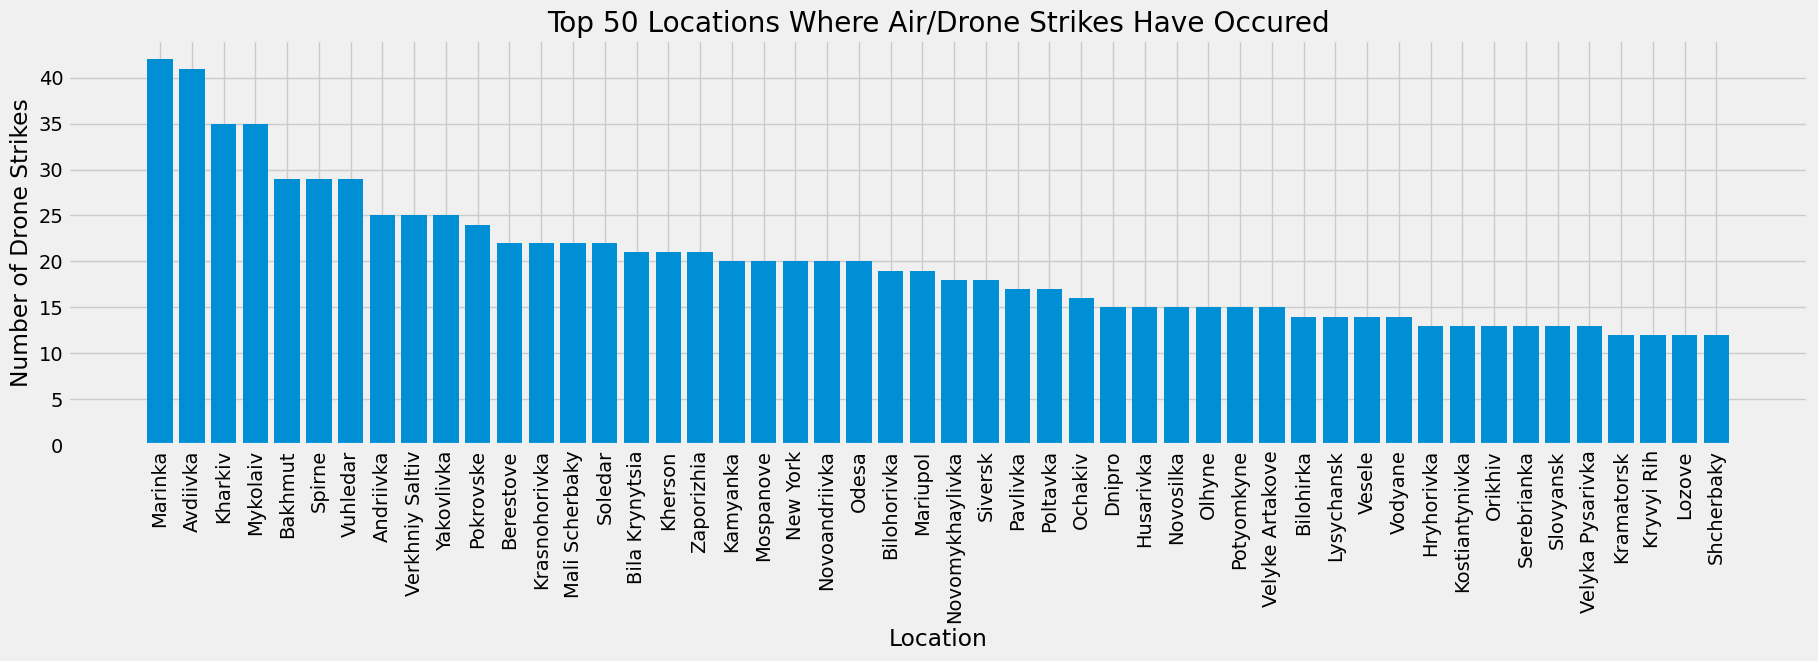

In [36]:
plt.figure(figsize=(20, 5))
plt.bar(events16['location'], events16['count'])
plt.title('Top 50 Locations Where Air/Drone Strikes Have Occured')
plt.ylabel('Number of Drone Strikes')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# The hardest hit city was Marinka, which was largely destroyed by the Russian invasion. No civilians have lived there since Nov 2022.

Have riots increased or decreased over time?

In [37]:
df13 = df.loc[(df['event_type'] == "Riots") & (df['fatalities'] >= 0), :]

In [38]:
exl = df13.groupby('year')[['event_type']].count()
exl = exl.reset_index()
exl.columns = ["year","count"]
events17 = exl.nlargest(50000,"count")
events17

,year,count
0,2018,156
1,2019,129
2,2020,87
3,2021,42
4,2022,6


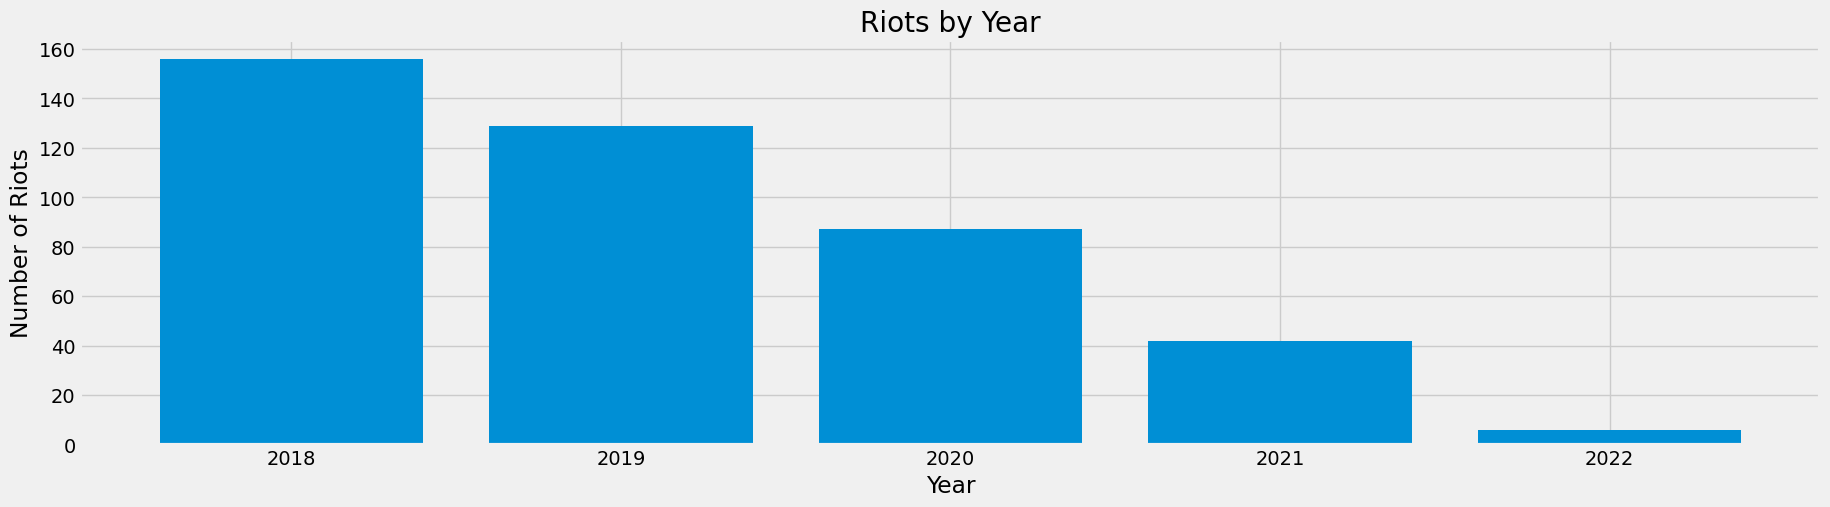

In [39]:
plt.figure(figsize=(20, 5))
plt.bar(events17['year'], events17['count'])
plt.title('Riots by Year')
plt.ylabel('Number of Riots')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()

In [40]:
# Riots have decreased over time. They peaked in 2018, and have declined in each year since.

Did violence against civilians increase or decrease from 2020 to present?

In [41]:
df14 = df.loc[(df['event_type'] == "Violence against civilians") & (df['year'] >= 2020), :]

In [42]:
exl = df14.groupby('year')[['event_type']].count()
exl = exl.reset_index()
exl.columns = ["year","count"]
events19 = exl.nlargest(10,"count")
events19

,year,count
2,2022,692
0,2020,58
1,2021,39
3,2023,4


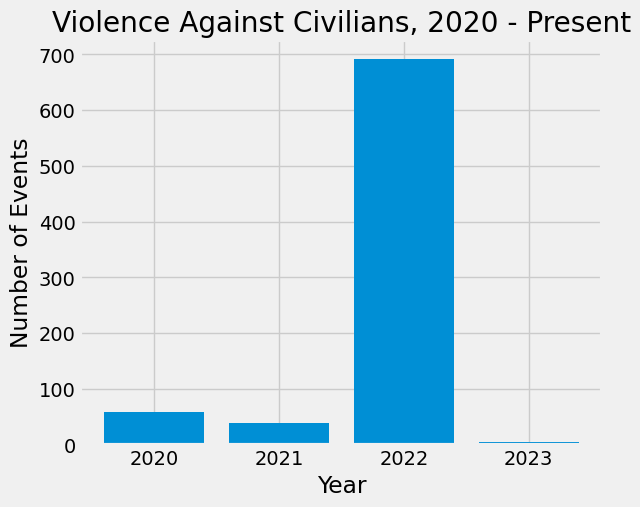

In [47]:
plt.figure(figsize=(6, 5))
plt.bar(events19['year'], events19['count'])
plt.title('Violence Against Civilians, 2020 - Present')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.show()

What about violence against civilians in Kyiv?

In [51]:
df16 = df.loc[(df['event_type'] == "Violence against civilians") & (df['year'] >= 2020) & (df['fatalities'] >= 0) & (df['location'] == 'Kyiv'), :]

In [52]:
exl = df16.groupby('year')[['event_type']].count()
exl = exl.reset_index()
exl.columns = ["year","count"]
events20 = exl.nlargest(100,"count")
events20

,year,count
2,2022,11
1,2021,7
0,2020,3


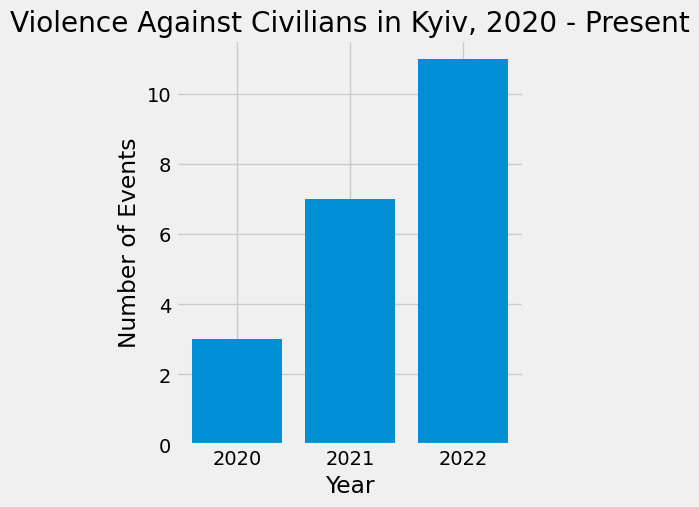

In [53]:
plt.figure(figsize=(4, 5))
plt.bar(events20['year'], events20['count'])
plt.title('Violence Against Civilians in Kyiv, 2020 - Present')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.show()